<a href="https://colab.research.google.com/github/SimiMaithani/Simi_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
# Write your code here
import nltk; nltk.download('stopwords')
!python3 -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [3]:
# Installing gensim and pyLDAvis modules
!pip install pyLDAvis==2.1.2
!pip install gensim==3.8.3
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [4]:
# Prepare stopwords

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [5]:
df = pd.read_csv('citeseer1_file.csv')
df

,Title,Abstract
0,A Maximum Entropy approach to Natural Language...,The concept of maximum entropy can be traced b...
1,Natural Language Processing,Scaling conditional random fields for natural ...
2,Linguistics and Natural Language Processing,The paper addresses the issue of cooperation b...
3,Natural Language Processing,In most natural language processing applicati...
4,Natural language processing (almost) from scratch,We propose a unified neural network architect...
...,...,...
994,Natural language processing (almost) from scratch,We propose a unified neural network archite...
995,Natural language processing,Natural Language Processing The subject of ...
996,Natural Language Processing/Robotics,Robots that interact with humans face-to-fa...
997,Tutorial on Natural Language Processing,Natural languages are languages spoken by h...


In [6]:
# # Convert to list
data = df['Abstract'].tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['The concept of maximum entropy can be traced back along multiple threads to '
 'Biblical times. Only recently, however, have computers become powerful '
 'enough to permit the widescale application of this concept to real world '
 'problems in statistical estimation and pattern recognition. In this paper we '
 'des ']


In [7]:
# Tokenize words and cleap up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['the', 'concept', 'of', 'maximum', 'entropy', 'can', 'be', 'traced', 'back', 'along', 'multiple', 'threads', 'to', 'biblical', 'times', 'only', 'recently', 'however', 'have', 'computers', 'become', 'powerful', 'enough', 'to', 'permit', 'the', 'widescale', 'application', 'of', 'this', 'concept', 'to', 'real', 'world', 'problems', 'in', 'statistical', 'estimation', 'and', 'pattern', 'recognition', 'in', 'this', 'paper', 'we', 'des']]


In [8]:
# Creating bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['the', 'concept', 'of', 'maximum', 'entropy', 'can', 'be', 'traced', 'back', 'along', 'multiple', 'threads', 'to', 'biblical', 'times', 'only', 'recently', 'however', 'have', 'computers', 'become', 'powerful', 'enough', 'to', 'permit', 'the', 'widescale', 'application', 'of', 'this', 'concept', 'to', 'real', 'world', 'problems', 'in', 'statistical', 'estimation', 'and', 'pattern', 'recognition', 'in', 'this', 'paper', 'we', 'des']


In [9]:
# Remove Stopwords, Make Bigrams and Lemmatize
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Now calling the functions in order

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['entropy', 'trace', 'back', 'multiple', 'thread', 'biblical', 'time', 'recently', 'however', 'computer', 'become', 'powerful', 'enough', 'permit', 'widescale', 'application', 'concept', 'real', 'world', 'problem', 'statistical', 'estimation', 'pattern', 'recognition', 'paper']]


In [10]:
# Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]]


In [11]:
id2word[0]

'application'

In [12]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('application', 1),
  ('back', 1),
  ('become', 1),
  ('biblical', 1),
  ('computer', 1),
  ('concept', 1),
  ('enough', 1),
  ('entropy', 1),
  ('estimation', 1),
  ('however', 1),
  ('multiple', 1),
  ('paper', 1),
  ('pattern', 1),
  ('permit', 1),
  ('powerful', 1),
  ('problem', 1),
  ('real', 1),
  ('recently', 1),
  ('recognition', 1),
  ('statistical', 1),
  ('thread', 1),
  ('time', 1),
  ('trace', 1),
  ('widescale', 1),
  ('world', 1)]]

In [13]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [14]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"recognition" + 0.040*"thread" + 0.040*"problem" + 0.040*"real" + '
  '0.040*"widescale" + 0.040*"permit" + 0.040*"statistical" + 0.040*"world" + '
  '0.040*"trace" + 0.040*"recently"'),
 (1,
  '0.136*"linguistic" + 0.091*"cooperation" + 0.045*"general" + '
  '0.045*"particular" + 0.045*"nlp" + 0.045*"namely" + 0.045*"machine" + '
  '0.045*"issue" + 0.045*"virtually" + 0.045*"ignore"'),
 (2,
  '0.008*"broad" + 0.008*"cover" + 0.008*"unify" + 0.008*"various" + '
  '0.008*"versatility" + 0.008*"analysis" + 0.008*"task" + 0.008*"consider" + '
  '0.008*"sense" + 0.008*"narrow"'),
 (3,
  '0.166*"language" + 0.125*"natural" + 0.042*"accomplish" + 0.042*"goal" + '
  '0.042*"form" + 0.042*"employ" + 0.042*"technique" + 0.042*"currently" + '
  '0.042*"field" + 0.042*"understand"'),
 (4,
  '0.142*"language" + 0.095*"understand" + 0.095*"way" + 0.095*"natural" + '
  '0.048*"refer" + 0.048*"able" + 0.048*"people" + 0.048*"processing" + '
  '0.048*"meaning" + 0.048*"development"'),
 (

In [15]:
# Compute Model Perplexity and Coherence Score

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.0820071994459965

Coherence Score:  0.4352043595814841


In [16]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2021-10-23 00:04:32--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  10.4MB/s    in 1.5s    

2021-10-23 00:04:34 (10.4 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [17]:
!unzip mallet-2.0.8.zipn

unzip:  cannot find or open mallet-2.0.8.zipn, mallet-2.0.8.zipn.zip or mallet-2.0.8.zipn.ZIP.


In [65]:
mallet_path = "mallet-2.0.8/bin/mallet"
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [67]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(8,
  [('language', 0.3954305799648506),
   ('natural', 0.30579964850615116),
   ('processing', 0.27240773286467485),
   ('application', 0.026362038664323375),
   ('narrow', 0.0),
   ('sense', 0.0),
   ('broad', 0.0),
   ('consider', 0.0),
   ('cover', 0.0),
   ('level', 0.0)]),
 (9,
  [('natural', 0.37132987910189985),
   ('language', 0.3488773747841105),
   ('computer', 0.27806563039723664),
   ('speech', 0.0017271157167530224),
   ('consider', 0.0),
   ('level', 0.0),
   ('versatility', 0.0),
   ('analysis', 0.0),
   ('broad', 0.0),
   ('unify', 0.0)]),
 (5,
  [('language', 0.4786476868327402),
   ('natural', 0.28647686832740216),
   ('processing', 0.23309608540925267),
   ('cover', 0.0017793594306049821),
   ('level', 0.0),
   ('refer', 0.0),
   ('analysis', 0.0),
   ('broad', 0.0),
   ('consider', 0.0),
   ('various', 0.0)]),
 (11,
  [('language', 0.31382978723404253),
   ('computer', 0.24468085106382978),
   ('natural', 0.17375886524822695),
   ('application', 0.1684397163120567

In [68]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [69]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

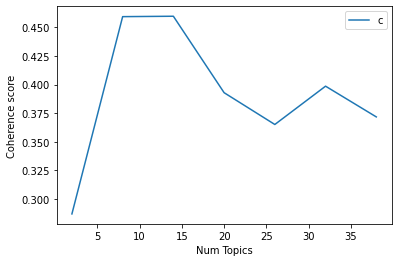

In [70]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3455
Num Topics = 8  has Coherence Value of 0.5923
Num Topics = 14  has Coherence Value of 0.4742
Num Topics = 20  has Coherence Value of 0.391
Num Topics = 26  has Coherence Value of 0.3972
Num Topics = 32  has Coherence Value of 0.4045
Num Topics = 38  has Coherence Value of 0.384


In [24]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.154*"condition" + 0.154*"term" + 0.077*"deposit" + 0.077*"conditional" + '
  '0.077*"copyright" + 0.077*"access" + 0.077*"field" + 0.077*"scale" + '
  '0.077*"retain" + 0.076*"random"'),
 (1,
  '0.085*"field" + 0.085*"employ" + 0.085*"point" + 0.085*"goal" + '
  '0.085*"form" + 0.085*"technique" + 0.085*"collection" + 0.085*"unprocessed" '
  '+ 0.084*"accomplish" + 0.083*"speak"'),
 (2,
  '0.364*"language" + 0.313*"natural" + 0.297*"processing" + 0.026*"computer" '
  '+ 0.000*"narrow" + 0.000*"analysis" + 0.000*"broad" + 0.000*"consider" + '
  '0.000*"cover" + 0.000*"level"'),
 (3,
  '0.537*"language" + 0.343*"natural" + 0.115*"processing" + 0.003*"syntactic" '
  '+ 0.002*"work" + 0.000*"cover" + 0.000*"versatility" + 0.000*"analysis" + '
  '0.000*"broad" + 0.000*"consider"'),
 (4,
  '0.125*"task" + 0.062*"labeling" + 0.062*"unify" + 0.062*"specific" + '
  '0.062*"role" + 0.062*"part" + 0.062*"tagging" + 0.062*"versatility" + '
  '0.062*"eng" + 0.062*"avoid"'),
 (5,
  '0.358*

In [25]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.2801,"multiple, world, trace, real, problem, time, p...",The concept of maximum entropy can be traced b...
1,1,0.0,0.2332,"condition, term, deposit, conditional, copyrig...",Scaling conditional random fields for natural ...
2,2,18.0,0.2500,"linguistic, cooperation, virtually, machine, a...",The paper addresses the issue of cooperation b...
3,3,7.0,0.2008,"logic, description, pragmatic, drive, process,...",In most natural language processing applicati...
4,4,4.0,0.2549,"task, labeling, unify, specific, role, part, t...",We propose a unified neural network architect...
5,5,16.0,0.2010,"sense, broad, issue, syntactic, sentence, narr...",Natural Language Processing The subject of Nat...
6,6,9.0,0.2400,"human, face, robot, speak, interpretation, res...",Robots that interact with humans face-to-face ...
7,7,1.0,0.1917,"field, employ, point, goal, form, technique, c...",Natural languages are languages spoken by huma...
8,8,12.0,0.1766,"understand, nlp, refer, ability, meaning, deve...",ABSTRACT: Ambiguity can be referred as the abi...
9,9,6.0,0.0577,"natural, language, processing, level, refer, a...",Natural language Processing


In [26]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2348,"condition, term, deposit, conditional, copyrig...",Scaling conditional random fields for natural...
1,1.0,0.1995,"field, employ, point, goal, form, technique, c...",Natural languages are languages spoken by hum...
2,2.0,0.0660,"language, natural, processing, computer, narro...",Natural Language Processing
3,3.0,0.0639,"language, natural, processing, syntactic, work...",Natural Language Processing
4,4.0,0.2549,"task, labeling, unify, specific, role, part, t...",We propose a unified neural network architect...


In [27]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,14.0,"multiple, world, trace, real, problem, time, p...",102.0,0.1021
1.0,0.0,"condition, term, deposit, conditional, copyrig...",100.0,0.1001
2.0,18.0,"linguistic, cooperation, virtually, machine, a...",15.0,0.0150
3.0,7.0,"logic, description, pragmatic, drive, process,...",20.0,0.0200
4.0,4.0,"task, labeling, unify, specific, role, part, t...",100.0,0.1001
...,...,...,...,...
994.0,4.0,"task, labeling, unify, specific, role, part, t...",NaN,NaN
995.0,16.0,"sense, broad, issue, syntactic, sentence, narr...",NaN,NaN
996.0,9.0,"human, face, robot, speak, interpretation, res...",NaN,NaN
997.0,1.0,"field, employ, point, goal, form, technique, c...",NaN,NaN


## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [56]:
# Write your code here

#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [57]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [58]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [59]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [60]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [61]:
# Calculating the coherence values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [62]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

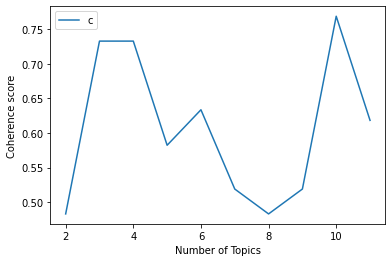

In [63]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [64]:
number_of_topics=10
words=10
document_list,titles=load_data("","citeseer1_file.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)


Total Number of Documents: 1000
[(0, '0.612*"languag" + 0.540*"natur" + 0.442*"process" + 0.110*"semant" + 0.073*"human" + 0.071*"robot" + 0.069*"use" + 0.069*"way" + 0.068*"ambigu" + 0.062*"linguist"'), (1, '-0.451*"linguist" + -0.233*"nlp" + -0.225*"cooper" + 0.216*"robot" + -0.192*"paper" + -0.184*"applic" + 0.167*"human" + -0.159*"concept" + -0.159*"entropi" + -0.159*"maximum"'), (2, '0.342*"linguist" + -0.264*"entropi" + -0.264*"concept" + -0.264*"maximum" + 0.209*"nlp" + 0.171*"cooper" + -0.164*"recognit" + 0.160*"one" + -0.149*"recent" + -0.135*"statist"'), (3, '-0.245*"task" + 0.201*"ambigu" + -0.200*"process" + 0.192*"way" + -0.178*"includ" + -0.178*"speech" + 0.174*"robot" + -0.166*"semant" + 0.147*"human" + 0.145*"comput"'), (4, '-0.306*"robot" + 0.302*"ambigu" + -0.267*"use" + -0.260*"linguist" + -0.204*"face" + -0.184*"semant" + -0.167*"human" + -0.165*"interpret" + -0.165*"need" + 0.137*"understood"'), (5, '0.235*"task" + -0.204*"condit" + -0.180*"process" + 0.174*"propos

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [50]:
# Write your answer here (no code needed for this question)
# In LSA an LDA, each topic consist of a collection of words and each document is a mixture of topics. 
# We can see from the LSA graph above that out of the number of topics in the x-axis, 10 has the highest coherence
# score on the y-axis. Therefore the optimum number of topics are 7 for LSA model.
# In the LDA model, the perplexity came out to be -3.0820071994459965 which is not bad given that the lower the 
# better the model is. coherence score is a better indicator than perplexity and helps in better understanding 
# how good a model is. The initial coherence score is 0.4352043595814841. The higher the coherence score the better the
# model is assumed to be. After changing the LDA algorithm and calculating the coherence score the second time, the
# coherence value increased from 0.43 to 0.53.The optimal number of topics for the LDA model is 8. In my opinion LDA
# is better than LSA because it has higher accuracy. LSA is also much faster to train than LDA.
